In [2]:
import pygame, argparse, csv, time
import argparse
import numpy as np
from time import sleep
from numpy.random import randint
from queue import PriorityQueue
from itertools import count
import matplotlib.pyplot as plt
import copy

pygame 2.5.2 (SDL 2.28.3, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
def is_in_maze(pos, grid_size):
    return pos[0] >= 0 and pos[0] < grid_size[0] and pos[1] >= 0 and pos[1] < grid_size[1]

In [4]:
def get_possible_moves(curr_pos, grid_size):
    possible_moves = []
    actions_1 = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    actions_2 = [(0, 2), (0, -2), (2, 0), (-2, 0)]

    for i in range(len(actions_1)):
        actions_1x, actions_1y = actions_1[i]
        actions_2x, actions_2y = actions_2[i]
        new_pos_1 = (curr_pos[0] + actions_1x, curr_pos[1] + actions_1y)
        new_pos_2 = (curr_pos[0] + actions_2x, curr_pos[1] + actions_2y)
        if is_in_maze(new_pos_1, grid_size) and is_in_maze(new_pos_2, grid_size):
            possible_moves.append([new_pos_1, new_pos_2])

    return possible_moves

In [5]:
def generate_move(grid, curr_pos, pos_visited, back_track):
    (x, y) = curr_pos
    grid[x][y] = 1
    
    grid_size = (len(grid), len(grid[0]))
    possible_moves = get_possible_moves(curr_pos, grid_size)

    valid_moves = []
    for move in possible_moves:
        (x1, y1) = move[0]
        (x2, y2) = move[1]

        if (grid[x1, y1] != 1) & (grid[x2, y2] != 1) & (grid[x1, y1] != 2) & (grid[x2, y2] != 2):
            valid_moves.append(move)

    
    if (len(valid_moves) == 0):
        curr_pos = pos_visited[-2 - back_track]
        if curr_pos == (0, 0):
            done = True
            return grid, curr_pos, pos_visited, back_track, done
        back_track += 1
        done = False
        return grid, curr_pos, pos_visited, back_track, done
    else:
        back_track = 0
        curr_pos = valid_moves[randint(len(valid_moves)) - 1]
        (x1, y1) = curr_pos[0]
        (x2, y2) = curr_pos[1]
        grid[x1][y1] = 1
        grid[x2][y2] = 4
        curr_pos = curr_pos[1]
        done = False
        return grid, curr_pos, pos_visited, back_track, done

In [6]:
start_time = time.time()
for maze in range(70):
    num_rows = 41
    num_columns = num_rows
    grid = np.zeros((num_rows, num_columns))
    print(f"Creating Maze {maze}/35...")
    done = False
    curr_pos = (0, 0)
    pos_visited = []
    pos_visited.append(curr_pos)
    back_track = 0
    grid[0, 0] = 2
    grid[-1, -1] = 3
    while not done:
        grid, curr_pos, pos_visited, back_track, done = generate_move(grid, curr_pos, pos_visited, back_track)
        if curr_pos not in pos_visited:
            pos_visited.append(curr_pos)
    
    with open(f"mazes/maze_{maze}.csv", mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(grid)
        print(f"{time.time()-start_time:.2f} s")

print(f"--- Finished {time.time() - start_time:.2f} seconds ---")

Creating Maze 0/35...
0.41 s
Creating Maze 1/35...
1.05 s
Creating Maze 2/35...
1.61 s
Creating Maze 3/35...
2.05 s
Creating Maze 4/35...
2.41 s
Creating Maze 5/35...
2.62 s
Creating Maze 6/35...
3.17 s
Creating Maze 7/35...
3.71 s
Creating Maze 8/35...
4.13 s
Creating Maze 9/35...
4.38 s
Creating Maze 10/35...
4.92 s
Creating Maze 11/35...
5.28 s
Creating Maze 12/35...
5.60 s
Creating Maze 13/35...
6.01 s
Creating Maze 14/35...
6.36 s
Creating Maze 15/35...
6.81 s
Creating Maze 16/35...
7.22 s
Creating Maze 17/35...
7.63 s
Creating Maze 18/35...
7.92 s
Creating Maze 19/35...
8.44 s
Creating Maze 20/35...
8.87 s
Creating Maze 21/35...
9.46 s
Creating Maze 22/35...
9.88 s
Creating Maze 23/35...
10.53 s
Creating Maze 24/35...
11.25 s
Creating Maze 25/35...
11.92 s
Creating Maze 26/35...
12.58 s
Creating Maze 27/35...
13.34 s
Creating Maze 28/35...
14.11 s
Creating Maze 29/35...
15.25 s
Creating Maze 30/35...
15.76 s
Creating Maze 31/35...
16.58 s
Creating Maze 32/35...
16.99 s
Creating M

In [7]:
class BFS_Node:
    def __init__(self, pos, parent):
        self.x = pos[0]
        self.y=pos[1]
        self.parent = parent

class BFS:
    def __init__(self,start,end,grid_size):
        self.start = start
        self.goal = end
        self.dim = grid_size
        self.queue = [BFS_Node(start,None)]
        self.visited=[]
    
    def get_path(self,node):
        path = []
        while node.parent!=None:
            path.append((node.x,node.y))
            node=node.parent
        return path
    
    def solution(self, grid):
        while True:
            current_node = self.queue.pop(0)
            x,y=current_node.x,current_node.y
            neighbours = [(x+1,y),(x-1,y),(x,y+1),(x,y-1)]
            for neighbour in neighbours:
                if is_in_maze(neighbour,self.dim) and (grid[neighbour[0]][neighbour[1]] in [1,3]):
                    next_node = BFS_Node(neighbour,current_node)
                    self.queue.append(next_node)
                    if(neighbour==self.goal):
                        self.visited.append(next_node)
                        return self.get_path(next_node),True
            
            self.visited.append(current_node)

            explored = [(node.x, node.y) for node in self.visited]
            for pos in explored:
                grid[pos[0], pos[1]] = 4

In [8]:
class DFS_Node:
    def __init__(self, pos, parent):
        self.x = pos[0]
        self.y = pos[1]
        self.parent = parent

class DFS:
    def __init__(self, start, end, grid_size):
        self.start = start
        self.goal = end
        self.dim = grid_size
        self.stack = [DFS_Node(start, None)]
        self.visited = []

    def get_path(self, node):
        path = []
        while node.parent != None:
            path.append((node.x, node.y))
            node = node.parent
        return path

    def solution(self, grid):
        while True:
            current = self.stack.pop(0)
            x, y = current.x, current.y
            neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
            for neighbor in neighbors:
                if is_in_maze(neighbor, self.dim) and grid[neighbor[0]][neighbor[1]] in [1, 3]:
                    new_node = DFS_Node(neighbor, current)
                    self.stack.insert(0, new_node)
                    if neighbor == self.goal:
                        self.visited.append(new_node)
                        return self.get_path(new_node), True
                    
            self.visited.append(current)
            explored = [(node.x, node.y) for node in self.visited]
            for pos in explored:
                grid[pos[0], pos[1]] = 4

In [9]:
class Astar_Node:
    def __init__(self,parent,g,cost,position):
        self.parent = parent
        self.g = g
        self.position = position
        self.f = cost

class Astar:
    def __init__(self,grid,start,end,grid_dim):
        self.grid=grid
        self.start = start
        self.end = end
        self.grid_dim=grid_dim
        self.openlist = PriorityQueue()
        self.closedlist = []
        self.path = []
        
    def heuristic1(self,position):
        return np.sqrt((position[0]-self.end[0])**2 + (position[1]-self.end[1])**2)
    
    def heuristic2(self,position):
        return abs(position[0]-self.end[0]) + abs(position[1]-self.end[1])
    
    def compute_children(self,node,heuristic):
        moves = [(0,1),(0,-1),(1,0),(-1,0)]
        children = []
        x,y = node.position
        for move in moves:
            new_pos = (x+move[0],y+move[1])
            if is_in_maze(new_pos,self.grid_dim) and self.grid[new_pos[0]][new_pos[1]]!=0 and new_pos not in self.closedlist:
                if heuristic == 1:
                    h=self.heuristic1(new_pos)
                else:
                    h=self.heuristic2(new_pos)
                
                g=node.g+1
                f=g+h
                new_node=Astar_Node(node,g,f,new_pos)
                children.append(new_node)
        return children
    
    def solution1(self):
        unique=count()
        h=self.heuristic1(self.start)
        g=0
        f=g+h
        start_node=Astar_Node(None,g,f,self.start)
        self.openlist.put((f,next(unique),start_node))
        while True:
            current=self.openlist.get()[2]
            if current.position == self.end:
                self.path.append(current.position)
                while current.parent:
                    current=current.parent
                    self.path.append(current.position)
                return self.path[::-1],True
            for child in self.compute_children(current,1):
                self.openlist.put((child.f,next(unique),child))
            self.closedlist.append(current.position)
            
        return self.path,False
    
    def solution2(self):
        unique=count()
        h=self.heuristic2(self.start)
        g=0
        f=g+h
        start_node=Astar_Node(None,g,f,self.start)
        self.openlist.put((f,next(unique),start_node))
        while True:
            current=self.openlist.get()[2]
            if current.position == self.end:
                self.path.append(current.position)
                while current.parent:
                    current=current.parent
                    self.path.append(current.position)
                return self.path[::-1],True
            for child in self.compute_children(current,2):
                self.openlist.put((child.f,next(unique),child))
            self.closedlist.append(current.position)
            
        return self.path,False


In [10]:
def bfs_time(grid, start, goal, grid_size):
    start_time = time.time()
    bfs = BFS(start, goal, grid_size)
    path = bfs.solution(grid)
    end_time = time.time()
    return end_time - start_time

def dfs_time(grid, start, goal, grid_size):
    start_time = time.time()
    dfs = DFS(start, goal, grid_size)
    path = dfs.solution(grid)
    end_time = time.time()
    return end_time - start_time

def astar1_time(grid, start, goal, grid_size):
    start_time = time.time()
    astar = Astar(grid, start, goal, grid_size)
    path,found = astar.solution1()
    end_time = time.time()
    return end_time - start_time

def astar2_time(grid, start, goal, grid_dim):
    start_time = time.time()
    astar = Astar(grid, start, goal, grid_dim)
    path, found = astar.solution2()
    end_time = time.time()
    return end_time - start_time

mazes/maze_0.csv
mazes/maze_1.csv
mazes/maze_2.csv
mazes/maze_3.csv
mazes/maze_4.csv
mazes/maze_5.csv
mazes/maze_6.csv
mazes/maze_7.csv
mazes/maze_8.csv
mazes/maze_9.csv
mazes/maze_10.csv
mazes/maze_11.csv
mazes/maze_12.csv
mazes/maze_13.csv
mazes/maze_14.csv
mazes/maze_15.csv
mazes/maze_16.csv
mazes/maze_17.csv
mazes/maze_18.csv
mazes/maze_19.csv
mazes/maze_20.csv
mazes/maze_21.csv
mazes/maze_22.csv
mazes/maze_23.csv
mazes/maze_24.csv
mazes/maze_25.csv
mazes/maze_26.csv
mazes/maze_27.csv
mazes/maze_28.csv
mazes/maze_29.csv
mazes/maze_30.csv
mazes/maze_31.csv
mazes/maze_32.csv
mazes/maze_33.csv
mazes/maze_34.csv


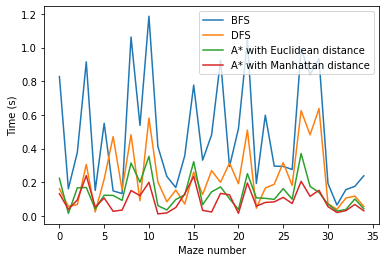

In [11]:
bfs_times = []
dfs_times = []
astar1_times = []
astar2_times = []

for i in range(35):
    address = "mazes/maze_" + str(i) + ".csv"
    print(address)
    grid = np.genfromtxt(address, delimiter=',', dtype=int)
    grid_size = grid.shape
    start = (0,0)
    goal = (grid_size[0]-1, grid_size[1]-1)
    grid[0, 0] = 2
    grid[-1, -1] = 3
    bfs_times.append(bfs_time(copy.deepcopy(grid), start, goal, grid_size))
    dfs_times.append(dfs_time(copy.deepcopy(grid), start, goal, grid_size))
    astar1_times.append(astar1_time(copy.deepcopy(grid), start, goal, grid_size))
    astar2_times.append(astar2_time(copy.deepcopy(grid), start, goal, grid_size))


plt.plot(bfs_times, label="BFS")
plt.plot(dfs_times, label="DFS")
plt.plot(astar1_times, label="A* with Euclidean distance")
plt.plot(astar2_times, label="A* with Manhattan distance")
plt.xlabel("Maze number")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

In [12]:
print("Average time for BFS: ", np.mean(bfs_times))
print("Average time for DFS: ", np.mean(dfs_times))
print("Average time for A* with Euclidean distance: ", np.mean(astar1_times))
print("Average time for A* with Manhattan distance: ", np.mean(astar2_times))

Average time for BFS:  0.48098032133919855
Average time for DFS:  0.228871556690761
Average time for A* with Euclidean distance:  0.13578591346740723
Average time for A* with Manhattan distance:  0.09243818010602678


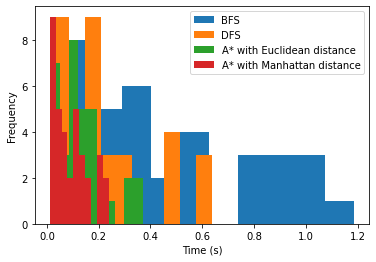

In [13]:
plt.hist(bfs_times, label="BFS")
plt.hist(dfs_times, label="DFS")
plt.hist(astar1_times, label="A* with Euclidean distance")
plt.hist(astar2_times, label="A* with Manhattan distance")
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


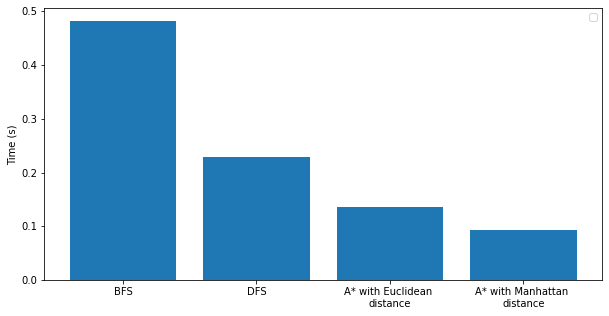

In [14]:
plt.figure(figsize=(10, 5))
plt.bar(np.arange(4), [np.mean(bfs_times), np.mean(dfs_times), np.mean(astar1_times), np.mean(astar2_times)])
plt.xticks(np.arange(4), ["BFS", "DFS", "A* with Euclidean \ndistance", "A* with Manhattan \ndistance"])
plt.ylabel("Time (s)")
plt.legend()
plt.show()